In [34]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Step 2: Load the dataset

sales_data= pd.read_csv('/content/drive/MyDrive/OASIS/Advertising.csv')

# Explore the dataset
print(sales_data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [37]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Unnamed: 0       Axes(0.125,0.712609;0.168478x0.167391)
TV            Axes(0.327174,0.712609;0.168478x0.167391)
Radio         Axes(0.529348,0.712609;0.168478x0.167391)
Newspaper     Axes(0.731522,0.712609;0.168478x0.167391)
Sales            Axes(0.125,0.511739;0.168478x0.167391)
dtype: object

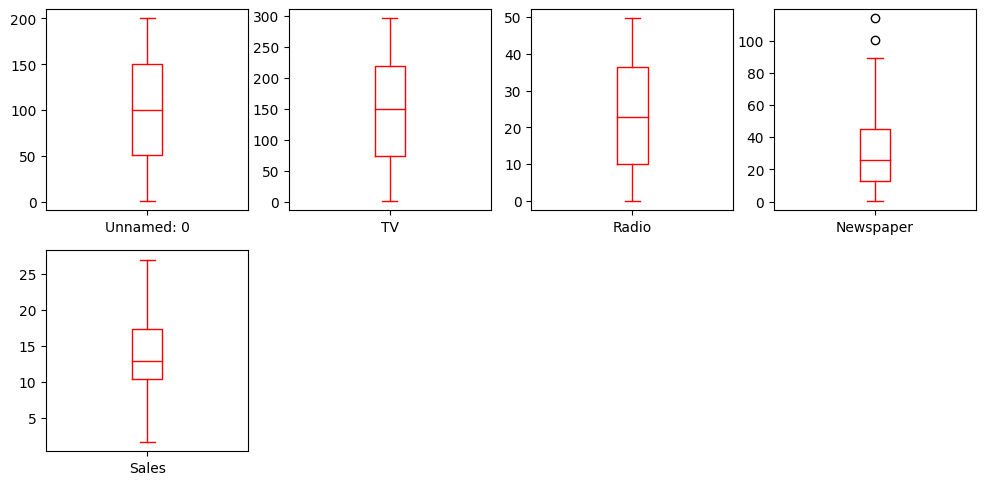

In [38]:
sales_data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12), color='red')

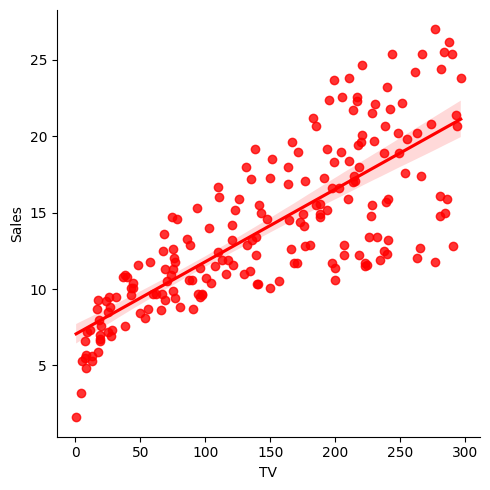

In [39]:
import seaborn as sns

# Assuming 'sales_data' contains the necessary data
sns.lmplot(x='TV', y='Sales', data=sales_data, line_kws={'color': 'red'}, scatter_kws={'color': 'red'})


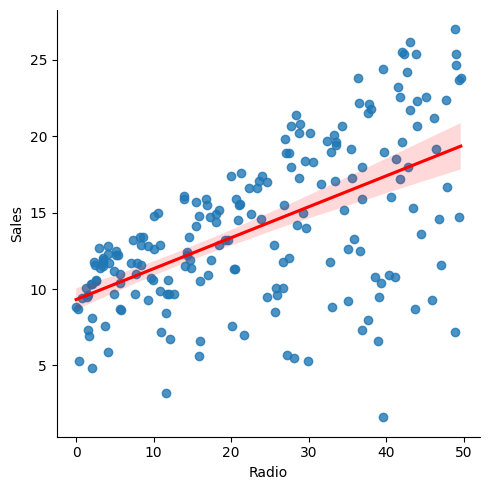

In [40]:
import seaborn as sns
# Assuming 'sales_data' contains the necessary data
sns.lmplot(x='Radio', y='Sales', data=sales_data, line_kws={'color': 'red'})

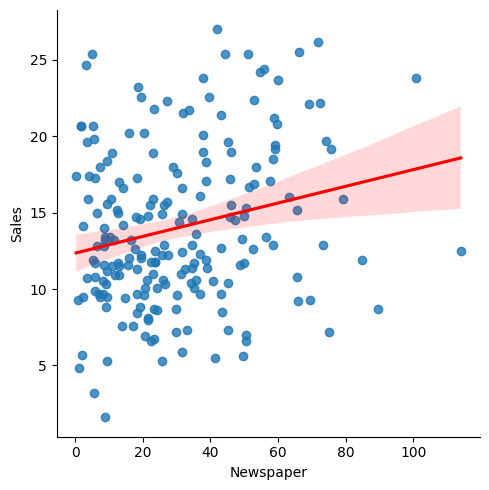

In [41]:
import seaborn as sns
# Assuming 'sales_data' contains the necessary data
sns.lmplot(x='Newspaper', y='Sales', data=sales_data, line_kws={'color': 'red'})


In [42]:
# Step 3: Data Preprocessing
# Assuming Unnamed: 0 is not useful for prediction
sales_data = sales_data.drop(columns=['Unnamed: 0'])

# Check for missing values
print(sales_data.isnull().sum())



TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [43]:
# Step 4: Split the Data
X = sales_data.drop(columns=['Sales'])
y = sales_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
# Step 5: Choose a Model
model = LinearRegression()



In [45]:
# Step 6: Train the Model
model.fit(X_train, y_train)



LinearRegression()

In [46]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [47]:
print(y_pred)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


In [48]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predict': y_pred.flatten()})
act_predict.head(10)

,Actual,Predict
0,16.9,16.408024
1,22.4,20.889882
2,21.4,21.553843
3,7.3,10.608503
4,24.7,22.112373
5,12.6,13.105592
6,22.3,21.057192
7,8.4,7.461010
8,11.5,13.606346
9,14.9,15.155070


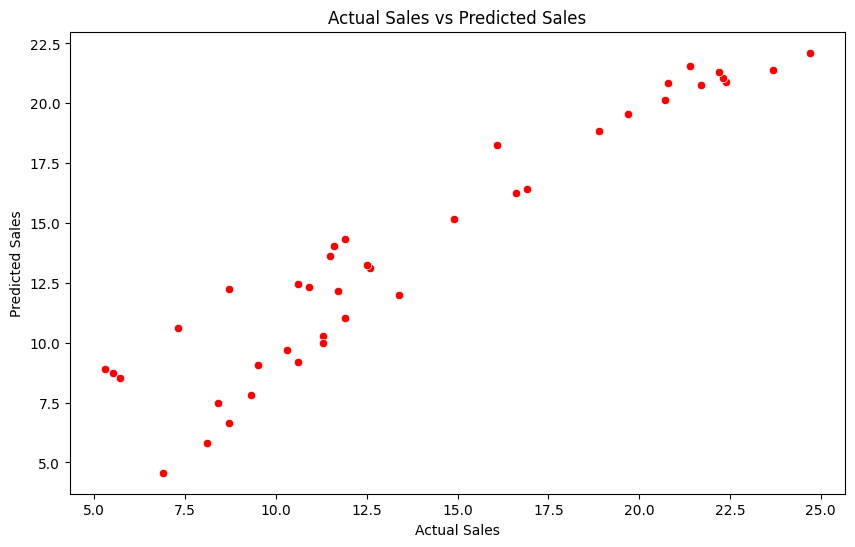

In [49]:
# Step 8: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red')  # Set color to red
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.show()


<Axes: >

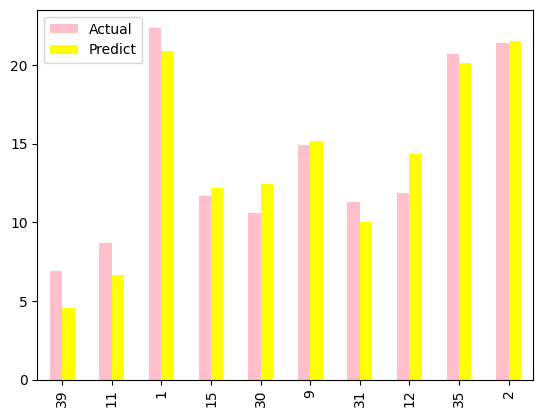

In [50]:
# graph of actual and predicted
# Sample 10 rows for demonstration
act_predict.sample(10).plot(kind='bar',  color=['pink', 'yellow'])